In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [7]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

In [8]:
n_estimators = [10,25,50,100,150,200,250,500,750,1000]
max_features = ['auto','sqrt','log2']
max_depth = [None,10,20,30,40,50]
min_samples_split = [2,5,10,15,20]
min_samples_leaf = [1,2,5,10,15]

grid_param = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
             'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [9]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=42, class_weight = 'balanced')
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = grid_param, n_iter = 500,
                              cv=5, verbose=2, random_state=42, n_jobs=-1)

In [10]:
y = df.attrition
X = df.drop('attrition',axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.8s


KeyboardInterrupt: 

In [ ]:
print(rf_random.best_params_)

In [ ]:
best_params = {n_estimators = 50, min_samples_split= 5, 
               min_samples_leaf= 5, max_features= 'auto', 
               max_depth = 10}

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

y = df.attrition
X = df.drop('attrition',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
scaler.fit_transform(X_train)

rf_optimal = RandomForestClassifier(n_estimators = 50, min_samples_split= 5, 
                                   min_samples_leaf= 5, max_features= 'auto', 
                                   max_depth = 10)

rf_optimal.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=50)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [15]:
y_pred = rf_optimal.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %")

The accuracy of the model is 87.0 %


In [16]:
train_probs = rf_optimal.predict_proba(X_train)[:,1] 
probs = rf_optimal.predict_proba(X_test)[:, 1]
train_predictions = rf_optimal.predict(X_train)

In [17]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 0.9812409812409812
Test ROC AUC  Score: 0.7638671875


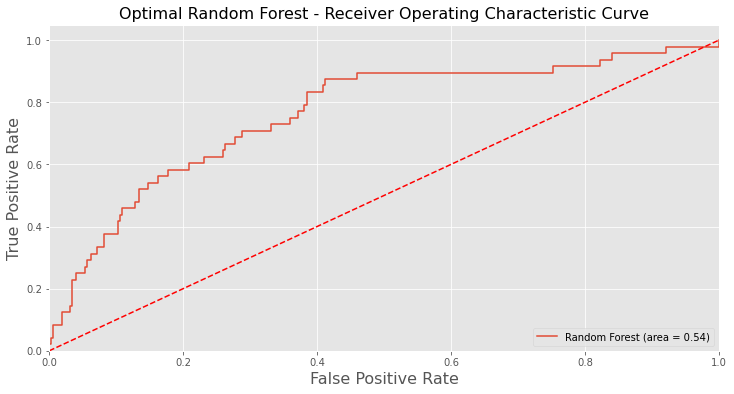

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf_optimal_auc = roc_auc_score(y_test, rf_optimal.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_optimal.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_optimal_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Optimal Random Forest - Receiver Operating Characteristic Curve', fontsize=16)
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print(rf_optimal_auc)